In [146]:
import os
from PIL import Image
# from torch.utils.data import Dataset
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import cv2
import glob
import random
import shutil
import numpy as np
import SimpleITK as sitk

In [162]:
orig_img_path = '../dataset/images/CHUM-001'
orig_mask_path = '../dataset/labels/CHUM-001'

orig_CT_img_path = orig_img_path+'__CT.nii.gz'
orig_PET_img_path = orig_CT_img_path.replace('__CT.nii.gz', '__PT.nii.gz')
orig_mask_path = orig_mask_path + '.nii.gz'

print(f'loading image from {orig_CT_img_path}')
print(f'loading image from {orig_PET_img_path}')

loading image from ../dataset/images/CHUM-001__CT.nii.gz
loading image from ../dataset/images/CHUM-001__PT.nii.gz


In [163]:
orig_CT_image = nib.load(orig_CT_img_path).get_fdata()
orig_PET_image = nib.load(orig_PET_img_path).get_fdata()
orig_mask = nib.load(orig_mask_path).get_fdata()

print(orig_CT_image.shape)
print(orig_PET_image.shape)
print(orig_mask.shape)

(512, 512, 91)
(128, 128, 91)
(512, 512, 91)


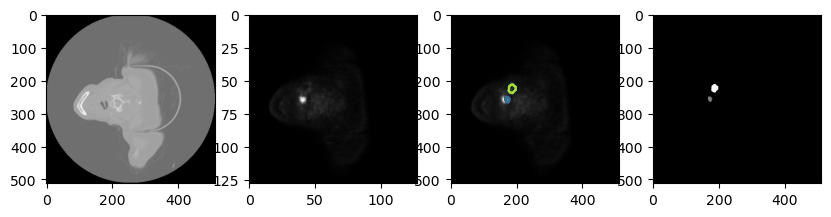

In [170]:
resized_pet = cv2.resize(orig_PET_image, (orig_CT_image.shape[0], orig_CT_image.shape[1]))

slice = 27
fig, ax = plt.subplots(ncols=4,figsize=(10,10))

ax[0].imshow(orig_CT_image[:,:,slice], cmap='gray')
ax[1].imshow(orig_PET_image[:,:,slice], cmap='gray')
ax[2].imshow(resized_pet[:,:,slice], cmap='gray')
ax[2].contour(orig_mask[:,:,slice])
ax[3].imshow(orig_mask[:,:,slice], cmap='gray')

# Hecktor resample

In [165]:
img_path = '../dataset/images_resampled/CHUM-001'
mask_path = '../dataset/labels_resampled/CHUM-001'

CT_img_path = img_path+'__CT.nii.gz'
PET_img_path = CT_img_path.replace('__CT.nii.gz', '__PT.nii.gz')
mask_path = mask_path + '.nii.gz'

print(f'loading image from {CT_img_path}')
print(f'loading image from {PET_img_path}')

loading image from ../dataset/images_resampled/CHUM-001__CT.nii.gz
loading image from ../dataset/images_resampled/CHUM-001__PT.nii.gz


In [166]:
# print shapes 
CT_image = nib.load(CT_img_path).get_fdata()
PET_image = nib.load(PET_img_path).get_fdata()
mask = nib.load(mask_path).get_fdata()

print(type(CT_image), CT_image.shape)
print(type(PET_image), PET_image.shape)

<class 'numpy.ndarray'> (225, 225, 149)
<class 'numpy.ndarray'> (225, 225, 149)


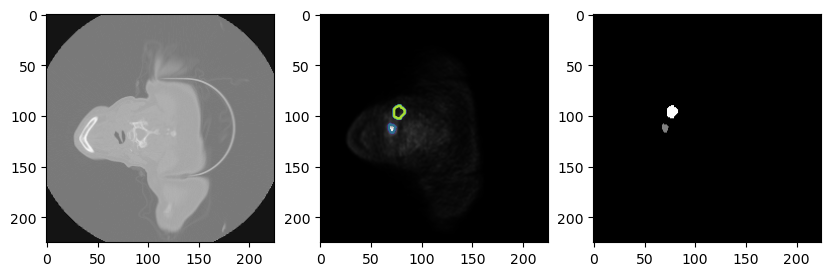

In [167]:
slice = 44
fig, ax = plt.subplots(ncols=3,figsize=(10,10))

ax[0].imshow(CT_image[:,:,slice], cmap='gray')
ax[1].imshow(PET_image[:,:,slice], cmap='gray')
ax[1].contour(mask[:,:,slice])
ax[2].imshow(mask[:,:,slice], cmap='gray')